In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

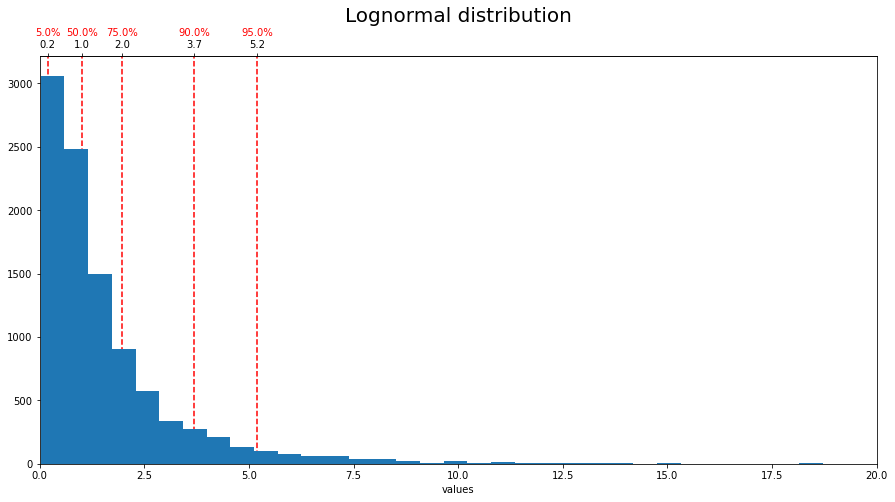

In [2]:
# imagine we need to plot a single variable discrete distribution 
rng = np.random.default_rng(3)
lognormal = rng.lognormal(size = 10000)
quantiles = np.array([0.05, 0.5, 0.75, 0.9, 0.95])
stats = np.quantile(lognormal, quantiles)

# data we want to plot
fig, ax = plt.subplots(figsize = (15, 7.5))
ax.set_xlim(right = 20)
ax.hist(lognormal, bins = 100)

# stat we want to label
ax1 = ax.secondary_xaxis('top')

locator = mticker.FixedLocator(stats)
ax1.xaxis.set_major_locator(locator)
ax1.set_xticklabels(list(map(lambda s: '{:.1f}'.format(s), stats.tolist())))

ax1.set_xticks(ax1.get_xticks(), minor = True)
ax1.set_xticklabels(list(map(lambda s: '{:.1%}'.format(s), quantiles.tolist())), minor = True)
ax1.xaxis.remove_overlapping_locs = False

# check if our ticks are perfect
for stat in stats: ax.axvline(stat, color = 'red', linestyle = '--', zorder = 0)

# formatting
ax1.tick_params(axis='x', which='minor', colors='red', length = 15, width = 0)
ax.tick_params(axis='x', which='minor', colors='red')

# ax.annotate('statistics', 
#             xy=(1,1), 
#             xytext=(0, ax1.xaxis.get_tick_padding()), 
#             ha='right', 
#             va=ax1.xaxis.get_ticks_position(),
#             xycoords='axes fraction', 
#             textcoords='offset points')
ax.set_xlabel('values', loc = 'center')

ax.set_title('Lognormal distribution', fontsize = 20)
plt.show()